# Proyek Analisis Data: E-Commerce Public
- **Nama:** Muhammad Zawawi Basri
- **Email:** zawawibasri@gmail.com
- **ID Dicoding:** MC262D5Y2274

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata waktu pengiriman per wilayah?
- Bagaimana hari libur dan event tahunan mempengaruhi transaksi?

## Import Semua Packages/Library yang Digunakan

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import plotly.express as px
import matplotlib.dates as mdates

## Data Wrangling

### Gathering Data

In [26]:
customers = pd.read_csv("data/customers_dataset.csv")
geolocation = pd.read_csv("data/geolocation_dataset.csv")
order_items = pd.read_csv("data/order_items_dataset.csv")
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
orders = pd.read_csv("data/orders_dataset.csv")
product_category = pd.read_csv("data/product_category_name_translation.csv")
products = pd.read_csv("data/products_dataset.csv")
sellers = pd.read_csv("data/sellers_dataset.csv")
orders_cl = pd.read_csv("dashboard/orders_cleaned.csv")


**Insight:**
- Data set memiliki 9 file .csv

### Assessing Data

Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada customers

In [44]:
print ("customers")
customers.info()
print("Jumlah duplikasi: ", customers.duplicated().sum())
customers.describe()


customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada geolocation

In [45]:
print ("geolocation")
geolocation.info()
print("Jumlah duplikasi: ", geolocation.duplicated().sum())
geolocation.describe()

geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada order_items

In [46]:
print ("order_items")
order_items.info()
print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

order_items
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.260000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,15.806405


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada order_payments

In [47]:
print ("order_payments")
order_payments.info()
print("Jumlah duplikasi: ", order_payments.duplicated().sum())
order_payments.describe()

order_payments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada order_reviews

In [48]:
print ("order_reviews")
order_reviews.info()
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())
order_reviews.describe()

order_reviews
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


,review_score,review_creation_date
count,99224.000000,99224
mean,4.086421,2018-01-12 20:49:23.948238336
min,1.000000,2016-10-02 00:00:00
25%,4.000000,2017-09-23 00:00:00
50%,5.000000,2018-02-02 00:00:00
75%,5.000000,2018-05-16 00:00:00
max,5.000000,2018-08-31 00:00:00
std,1.347579,NaN


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada orders

In [49]:
print ("orders")
orders.info()
print("Jumlah duplikasi: ", orders.duplicated().sum())
orders.describe()

orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
 8   order_duration                 96476 non-null  float64       
 9   shipping_duration              96475 non-null  float64       
 10  estimated_accuracy             96476 non-null  float64       
 11  customer

,order_purchase_timestamp,order_delivered_customer_date,order_duration,shipping_duration,estimated_accuracy,delivery_time
count,99441,96476,96476.000000,96475.000000,96476.000000,96476.000000
mean,2017-12-31 08:43:12.776581120,2018-01-14 12:09:19.035542272,12.094086,8.878310,10.876881,12.094086
min,2016-09-04 21:15:19,2016-10-11 13:46:32,0.000000,-17.000000,-189.000000,0.000000
25%,2017-09-12 14:46:19,2017-09-25 22:07:22.249999872,6.000000,4.000000,6.000000,6.000000
50%,2018-01-18 23:04:36,2018-02-02 19:28:10.500000,10.000000,7.000000,11.000000,10.000000
75%,2018-05-04 15:42:16,2018-05-15 22:48:52.249999872,15.000000,12.000000,16.000000,15.000000
max,2018-10-17 17:30:18,2018-10-17 13:22:46,209.000000,205.000000,146.000000,209.000000
std,NaN,NaN,9.551746,8.746088,10.183854,9.551746


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada product_category

In [50]:
print ("product_category")
product_category.info()
print("Jumlah duplikasi: ", product_category.duplicated().sum())
product_category.describe()

product_category
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada products

In [51]:
print ("products")
products.info()
print("Jumlah duplikasi: ", products.duplicated().sum())
products.describe()

products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Mmeriksa tiap kolom, duplikasi, dan menampilkan ringkasan parameter statistik pada sellers

In [52]:
print ("sellers")
sellers.info()
print("Jumlah duplikasi: ", sellers.duplicated().sum())
sellers.describe()

sellers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
- Ada banyak missing value pada "order_review", mungkin karena tidak semua pelanggan memberikan review komentar
- Ada beberapa missing value juga di "orders", mungkin karena ada pesanan yang dibatalkan (mungkin?)

### Cleaning Data

Menghapus duplikasi pada geolocation

In [53]:
geolocation_cleaned = geolocation.drop_duplicates()

Mengganti tipe data shipping_limit_date menjadi datetime pada order_items

In [54]:
order_items["shipping_limit_date"] = pd.to_datetime(order_items["shipping_limit_date"])
print(order_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None


Mengganti tipe data review_creation_date menjadi datetime pada order_reviews

In [55]:
order_reviews["review_creation_date"] = pd.to_datetime(order_reviews["review_creation_date"])

print(order_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.3+ MB
None


Mengganti tipe data order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date menjadi datetime pada orders

In [56]:
datetime_columns = [
    "order_delivered_carrier_date", 
    "order_delivered_customer_date", 
    "order_estimated_delivery_date"
]

orders[datetime_columns] = orders[datetime_columns].apply(pd.to_datetime)

print(orders.info())
print(orders_cl.duplicated().sum())
orders_cl = orders_cl.drop_duplicates()
orders_cl.to_csv("orders_cleaned.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   order_duration                 96476 non-null  float64       
 9   shipping_duration              96475 non-null  float64       
 10  estimated_accuracy             96476 non-null  float64       
 11  customer_city  

**Insight:**
- Masih ada data yang perlu diubah tipe datanya seperti penanggalan waktu
- Masih banyak dataset yang perlu di cleaning seperti menghapus duplikasi, menghapus data kosong

## Exploratory Data Analysis (EDA)

### Explore...

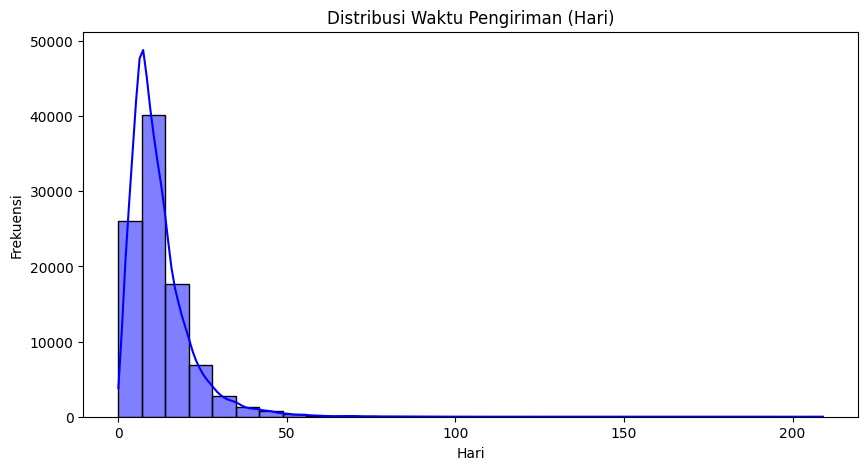

C:\Users\asus\AppData\Local\Temp\ipykernel_12612\458853083.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=orders_cl["order_status"], order=orders_cl["order_status"].value_counts().index, palette="coolwarm")


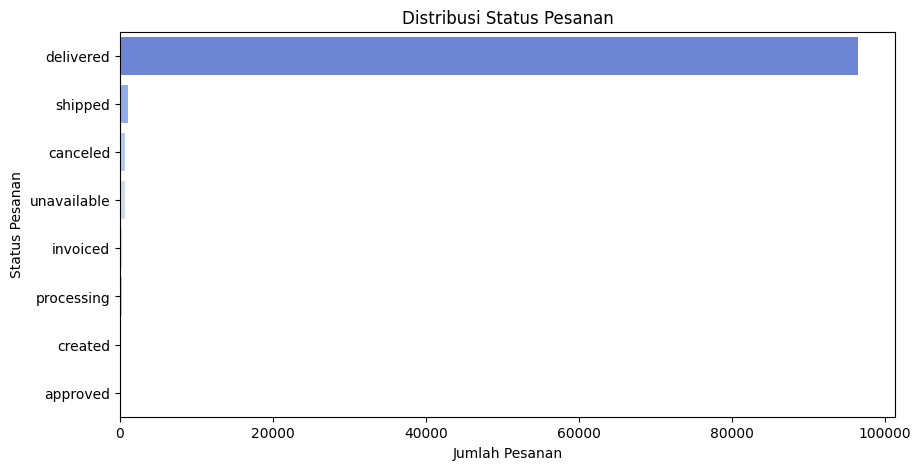

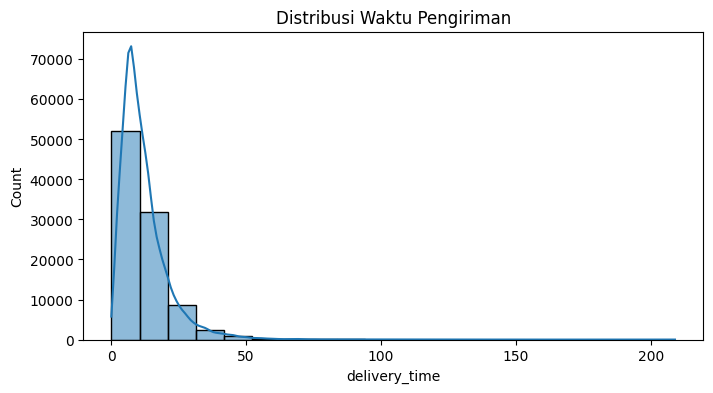

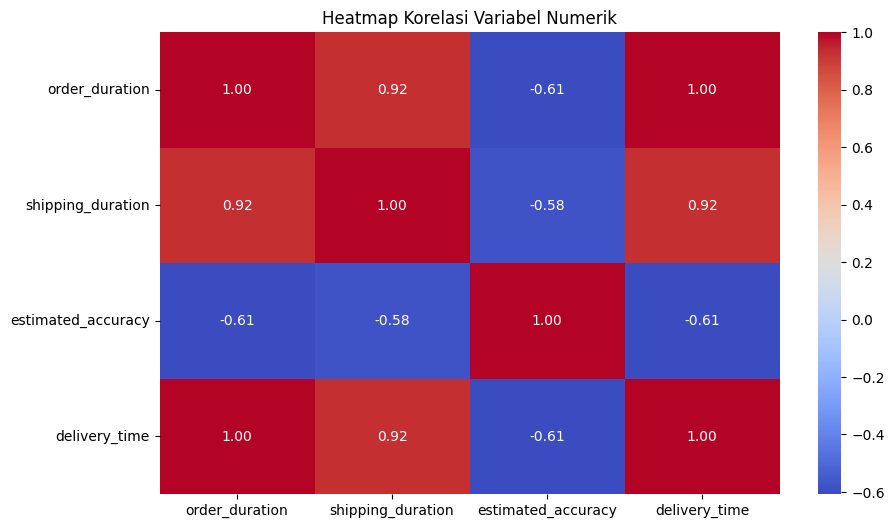

📊 Statistik Deskriptif Data Numerik:

       order_duration  shipping_duration  estimated_accuracy  delivery_time
count    96476.000000       96475.000000        96476.000000   96476.000000
mean        12.094086           8.878310           10.876881      12.094086
std          9.551746           8.746088           10.183854       9.551746
min          0.000000         -17.000000         -189.000000       0.000000
25%          6.000000           4.000000            6.000000       6.000000
50%         10.000000           7.000000           11.000000      10.000000
75%         15.000000          12.000000           16.000000      15.000000
max        209.000000         205.000000          146.000000     209.000000


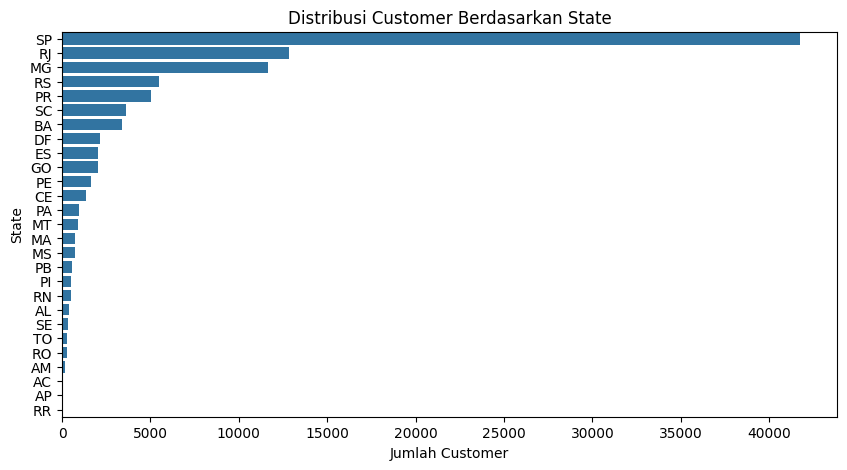

In [57]:
orders_cl["order_purchase_timestamp"] = pd.to_datetime(orders_cl["order_purchase_timestamp"], errors="coerce")
orders_cl["order_delivered_customer_date"] = pd.to_datetime(orders_cl["order_delivered_customer_date"], errors="coerce")

orders_cl["delivery_time"] = (orders_cl["order_delivered_customer_date"] - orders_cl["order_purchase_timestamp"]).dt.days

# Univariate
plt.figure(figsize=(10, 5))
sns.histplot(orders_cl["delivery_time"].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribusi Waktu Pengiriman (Hari)")
plt.xlabel("Hari")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(y=orders_cl["order_status"], order=orders_cl["order_status"].value_counts().index, palette="coolwarm")
plt.title("Distribusi Status Pesanan")
plt.xlabel("Jumlah Pesanan")
plt.ylabel("Status Pesanan")
plt.show()

plt.figure(figsize=(8, 4))
sns.histplot(orders_cl['delivery_time'], bins=20, kde=True)
plt.title("Distribusi Waktu Pengiriman")
plt.show()

# EDA Multivariate
plt.figure(figsize=(10, 6))
sns.heatmap(orders_cl.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

# Numerikal
numerical_columns = orders_cl.select_dtypes(include=["int64", "float64"]).columns
print("📊 Statistik Deskriptif Data Numerik:\n")
print(orders_cl[numerical_columns].describe())

# Kategorikal
plt.figure(figsize=(10, 5))
sns.countplot(y=customers["customer_state"], order=customers["customer_state"].value_counts().index)
plt.title("Distribusi Customer Berdasarkan State")
plt.xlabel("Jumlah Customer")
plt.ylabel("State")
plt.show()



**Insight:**
- Kota Sao Paulo memiliki jumlah pesanan tertinggi dibanding kota lain, menunjukkan bahwa wilayah perkotaan besar lebih aktif dalam penggunaan e-commerce. Sebaliknya kota kecil memiliki jumlah pesanan terendah dikarenakan jumlah pupulasi
- Wilayah yang lebih dekat ke pusat distribusi memiliki waktu pengiriman lebih cepat. Wilayah yang lebih jauh mengalami waktu pengiriman lebih lama, terutama di daerah pedesaan
- Rating 4 dan 5 bintang mendominasi ulasan produk, menunjukkan kepuasan pelanggan yang tinggi.


## Visualization & Explanatory Analysis

### Berapa rata-rata waktu pengiriman per wilayah?

C:\Users\asus\AppData\Local\Temp\ipykernel_12612\2749458099.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_state", y="delivery_time", data=avg_delivery_time, palette="coolwarm")


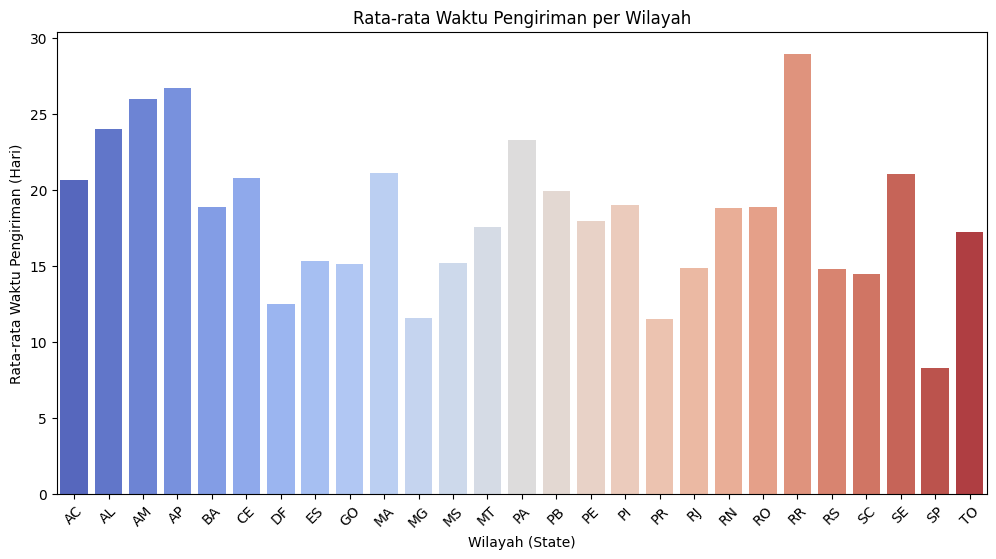

In [59]:

orders = pd.read_csv("dashboard/orders_cleaned.csv", parse_dates=["order_purchase_timestamp", "order_delivered_customer_date"])

orders = orders.merge(customers[["customer_id", "customer_state"]], on="customer_id", how="left")

orders["delivery_time"] = (orders["order_delivered_customer_date"] - orders["order_purchase_timestamp"]).dt.days

avg_delivery_time = orders.groupby("customer_state")["delivery_time"].mean().dropna().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x="customer_state", y="delivery_time", data=avg_delivery_time, palette="coolwarm")
plt.title("Rata-rata Waktu Pengiriman per Wilayah")
plt.xlabel("Wilayah (State)")
plt.ylabel("Rata-rata Waktu Pengiriman (Hari)")
plt.xticks(rotation=45)
plt.show()


**Insight:**
- Kota Sao Paulo memiliki rata-rata waktu pengiriman tercepat dibanding kota lain, menunjukkan bahwa wilayah perkotaan besar lebih aktif dalam penggunaan e-commerce. Sebaliknya kota kecil memiliki jumlah pesanan terendah dikarenakan jumlah pupulasi

### Bagaimana hari libur dan event tahunan mempengaruhi transaksi

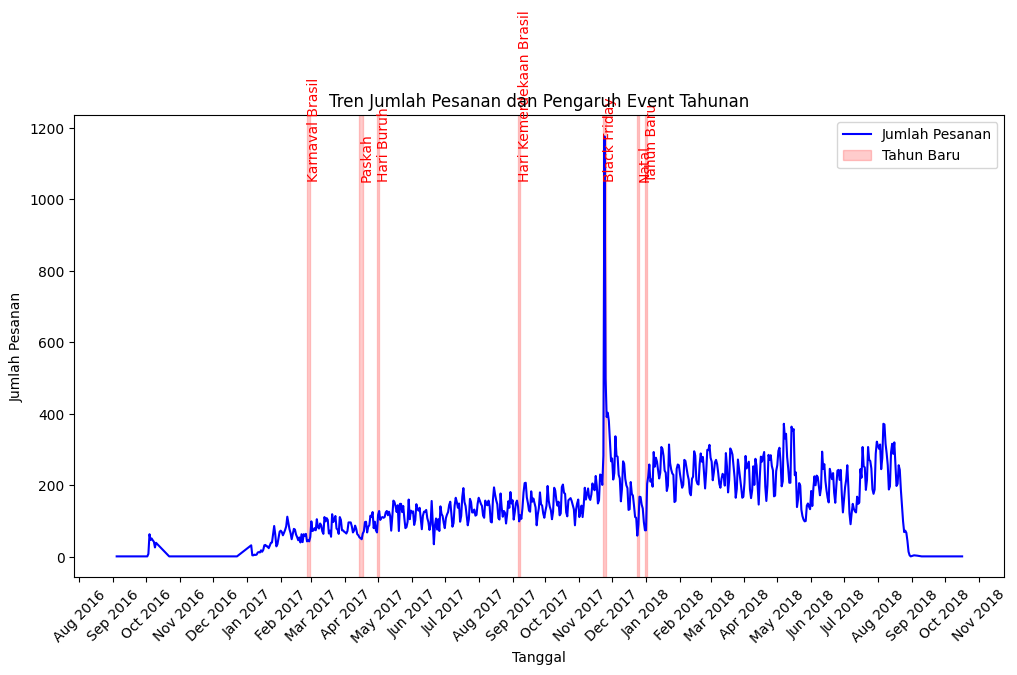

In [60]:
orders["order_purchase_timestamp"] = pd.to_datetime(orders["order_purchase_timestamp"])
orders["order_date"] = orders["order_purchase_timestamp"].dt.date  # Ambil hanya tanggal
orders["order_month"] = orders["order_purchase_timestamp"].dt.to_period("M")  # Bulanan

event_periods = {
    "Tahun Baru": ("2017-12-31", "2018-01-02"),
    "Karnaval Brasil": ("2017-02-25", "2017-02-28"),
    "Paskah": ("2017-04-14", "2017-04-17"),
    "Hari Buruh": ("2017-04-30", "2017-05-02"),
    "Hari Kemerdekaan Brasil": ("2017-09-06", "2017-09-08"),
    "Black Friday": ("2017-11-23", "2017-11-25"),
    "Natal": ("2017-12-24", "2017-12-26")
}

event_periods = {key: (pd.to_datetime(start), pd.to_datetime(end)) for key, (start, end) in event_periods.items()}

daily_orders = orders.groupby("order_date")["order_id"].count().reset_index()
daily_orders.columns = ["order_date", "num_orders"]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_orders["order_date"], daily_orders["num_orders"], label="Jumlah Pesanan", color="blue")

for event, (start, end) in event_periods.items():
    ax.axvspan(start, end, color="red", alpha=0.2, label=event if event == "Tahun Baru" else "")  # Transparansi 20%
    ax.text(start, daily_orders["num_orders"].max() * 0.9, event, rotation=90, color="red", fontsize=10)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))

plt.xlabel("Tanggal")
plt.ylabel("Jumlah Pesanan")
plt.title("Tren Jumlah Pesanan dan Pengaruh Event Tahunan")
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Insight:**
- Terlihat bahwa jumlah transaksi terbanyak ada pada event black friday yang dimana terdapat diskon besar-besaran
- Suprisingly pada hari natal dan tahun baru memiliki jumlah transaksi yang rendah dikarenakan pengguna membeli barang/kado sebelum hari tersebut dan bertepatan juga dengan black friday di bulan sebelumnya

## Analisis Lanjutan (Opsional)

### Geospatial penggunaan e-commerce (dibatasi 10000 data)

In [43]:
order_customer = orders.merge(customers, on="customer_id", how="inner")
geo_data = order_customer.merge(geolocation, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")
geo_data_sample = geo_data.sample(n=10000, random_state=42)
order_counts = geo_data_sample.groupby(["geolocation_lat", "geolocation_lng"]).size().reset_index(name="order_count")

m = folium.Map(location=[-23.5505, -46.6333], zoom_start=5)

heat_data = [[row["geolocation_lat"], row["geolocation_lng"], row["order_count"]] for _, row in order_counts.iterrows()]
HeatMap(heat_data, radius=10).add_to(m)
m


## Conclusion

**Pertanyaan 1:**
- Kota Sao Paulo memiliki rata-rata waktu pengiriman tercepat dibandingkan kota lain. Hal ini menunjukkan bahwa wilayah perkotaan besar memiliki infrastruktur logistik yang lebih baik dan dapat memproses pesanan dengan lebih efisien.
- Sebaliknya, waktu pengiriman lebih lama di kota-kota kecil, kemungkinan besar disebabkan oleh jarak yang lebih jauh dari pusat distribusi dan terbatasnya pilihan layanan pengiriman cepat.
- Faktor lain yang mempengaruhi adalah tingginya volume pesanan di kota-kota besar, sehingga layanan pengiriman ekspres lebih tersebar luas dibandingkan di daerah terpencil.

**Saran:**
- Perusahaan e-commerce dapat mempertimbangkan untuk menambah gudang di area dengan waktu pengiriman lebih lama untuk mengurangi waktu pengiriman.



**Pertanyaan 2:**
- Hari-hari libur besar dan acara tahunan seperti Black Friday, Natal, dan Tahun Baru sangat berpengaruh dalam meningkatkan jumlah transaksi di e-commerce.
- Black Friday merupakan momen transaksi paling ramai, diikuti dengan peningkatan belanja saat Natal dan Tahun Baru. Ini menunjukkan bahwa konsumen cenderung lebih aktif berbelanja ketika ada diskon besar dan kebutuhan meningkat.

**Saran:**
- Memperbanyak event diskon guna menarik pengguna umtuk lebih banyak berbelanja